In [0]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.metrics import mean_squared_error #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb


In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [0]:
train = train.rename(columns={'賃料':'Rent', '契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})
test = test.rename(columns={'契約期間':'Contract', '間取り':'Type', 
                              '築年数':'Age', '駐車場':'Parking', '室内設備':'Facility', 
                              '放送・通信':'Internet', '周辺環境':'Surround', '建物構造':'Material', 
                              '面積':'Area', 'キッチン':'Kitchen', '所在地':'Location',
                              'バス・トイレ':'Bath', '所在階':'Floor', 'アクセス':'Access', 
                              '方角':'Direction'})

In [0]:
train['Location'].value_counts()

東京都板橋区板橋３丁目1-8         54
東京都世田谷区太子堂２丁目          53
東京都足立区新田１丁目            47
東京都中野区白鷺２丁目1-21        45
東京都中央区日本橋馬喰町２丁目4-12    44
東京都豊島区池袋３丁目            43
東京都豊島区東池袋２丁目           40
東京都墨田区緑４丁目             39
東京都豊島区南長崎５丁目           38
東京都中央区日本橋馬喰町２丁目        38
東京都中野区江古田３丁目14-3       38
東京都港区南麻布１丁目            36
東京都杉並区方南１丁目            36
東京都中央区勝どき６丁目           35
東京都渋谷区笹塚２丁目            34
東京都台東区三筋１丁目            34
東京都杉並区堀ノ内３丁目           34
東京都江東区牡丹１丁目13-6        34
東京都足立区栗原３丁目            34
東京都中央区新富１丁目            33
東京都品川区南大井４丁目           32
東京都港区港南３丁目7-3          32
東京都江東区木場６丁目3           32
東京都北区滝野川６丁目            32
東京都江東区海辺               32
東京都目黒区下目黒２丁目           31
東京都杉並区高円寺南３丁目          31
東京都板橋区中丸町              30
東京都江東区東雲１丁目            30
東京都港区南青山６丁目            30
                       ..
東京都新宿区西新宿７丁目6-8         1
東京都目黒区目黒３丁目15-34        1
東京都中野区野方３丁目13-7         1
東京都葛飾区金町４丁目16番6号        1
東京都中央区八丁堀４丁目8-7         1
東京都豊島区上池袋１丁目３７－２２       1
東京都葛飾区東立石４丁目４５－１６       1
東京都世田谷区八幡山３丁

In [0]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['City'] = dataset['Location'].str.extract('(千代田区|中央区|港区|新宿区|文京区|'
                                                 '台東区|墨田区|江東区|品川区|目黒区|'
                                                 '大田区|世田谷区|渋谷区|中野区|杉並区|'
                                                 '豊島区|北区|荒川区|板橋区|練馬区|足立区|葛飾区|江戸川区)')

In [0]:
train['City'].value_counts()

世田谷区    3023
足立区     2191
大田区     2000
杉並区     1769
練馬区     1752
江戸川区    1702
板橋区     1624
港区      1513
江東区     1508
中央区     1279
品川区     1272
豊島区     1271
新宿区     1223
葛飾区     1212
中野区     1211
北区      1045
目黒区     1023
墨田区     1010
渋谷区      985
台東区      932
文京区      892
荒川区      576
千代田区     457
Name: City, dtype: int64

In [0]:
train['City'].fillna('東京都板橋区板橋',inplace=True)

In [0]:
train[['City', 'Rent']].groupby(['City'], as_index=False).mean().sort_values(by="Rent",ascending=False)

,City,Rent
16,港区,214061.744878
4,千代田区,182706.236324
1,中央区,180887.865520
15,渋谷区,171839.786802
17,目黒区,145674.389052
10,新宿区,130573.957482
9,文京区,128562.070628
5,台東区,127625.944206
14,江東区,126217.110743
6,品川区,124609.473270


In [0]:
for dataset in train_test_data:
    dataset['R'] = dataset['Type'].str.extract('([0-9])')
    dataset['K'] = dataset['Type'].str.extract('(K)')
    dataset['L'] = dataset['Type'].str.extract('(L)')
    dataset['D'] = dataset['Type'].str.extract('(D)')
    dataset['S'] = dataset['Type'].str.extract('(S)')


In [0]:
for dataset in train_test_data:
    dataset['K'] = dataset['K'].apply(lambda x: True if x == 'K' else False)
    dataset['D'] = dataset['D'].apply(lambda x: True if x == 'D' else False)
    dataset['L'] = dataset['L'].apply(lambda x: True if x == 'L' else False)
    dataset['S'] = dataset['S'].apply(lambda x: True if x == 'S' else False)

In [0]:
train[['id','R','K','D','L','S']].groupby(['id','R'],as_index=False).mean().head(10)

,id,R,K,D,L,S
0,1,1,True,False,False,False
1,2,1,False,False,False,False
2,3,1,True,False,False,False
3,4,2,True,True,True,False
4,5,2,True,True,False,False
5,6,2,True,True,True,False
6,7,1,True,False,False,False
7,8,1,True,False,False,False
8,9,2,True,True,False,False
9,10,1,True,True,False,False


In [0]:
train['Age'].value_counts()

0年1ヶ月      983
新築         889
0年0ヶ月      704
0年2ヶ月      644
0年3ヶ月      508
0年5ヶ月      484
0年6ヶ月      378
0年4ヶ月      323
12年5ヶ月     262
11年5ヶ月     227
11年6ヶ月     224
14年5ヶ月     216
11年7ヶ月     185
28年5ヶ月     181
12年6ヶ月     181
10年5ヶ月     181
13年5ヶ月     180
4年5ヶ月      172
15年6ヶ月     155
0年7ヶ月      152
16年5ヶ月     149
13年6ヶ月     148
30年5ヶ月     148
3年5ヶ月      141
2年5ヶ月      138
14年6ヶ月     137
29年5ヶ月     133
1年5ヶ月      130
6年5ヶ月      130
17年5ヶ月     130
          ... 
56年5ヶ月       1
51年11ヶ月      1
52年0ヶ月       1
61年1ヶ月       1
58年9ヶ月       1
61年9ヶ月       1
60年3ヶ月       1
58年11ヶ月      1
62年0ヶ月       1
53年9ヶ月       1
53年10ヶ月      1
50年0ヶ月       1
66年5ヶ月       1
62年2ヶ月       1
61年2ヶ月       1
63年4ヶ月       1
57年6ヶ月       1
60年2ヶ月       1
79年7ヶ月       1
59年8ヶ月       1
64年7ヶ月       1
56年9ヶ月       1
60年1ヶ月       1
55年11ヶ月      1
63年3ヶ月       1
55年9ヶ月       1
57年1ヶ月       1
61年10ヶ月      1
50年3ヶ月       1
62年1ヶ月       1
Name: Age, Length: 746, dtype: int64

In [0]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].str.replace('0年([0-9])*ヶ月', '1年', regex=True)
    dataset['Age'] = dataset['Age'].str.replace('新築', '0年', regex=True)

In [0]:
train['Age'].value_counts()

1年         4508
0年          889
31年         850
11年         725
21年         435
12年5ヶ月      262
11年5ヶ月      227
11年6ヶ月      224
41年         223
14年5ヶ月      216
11年7ヶ月      185
28年5ヶ月      181
12年6ヶ月      181
13年5ヶ月      180
4年5ヶ月       172
15年6ヶ月      155
16年5ヶ月      149
13年6ヶ月      148
3年5ヶ月       141
2年5ヶ月       138
14年6ヶ月      137
29年5ヶ月      133
6年5ヶ月       130
17年5ヶ月      130
1年5ヶ月       130
25年5ヶ月      129
12年11ヶ月     125
15年5ヶ月      122
27年5ヶ月      121
2年0ヶ月       120
           ... 
51年9ヶ月        1
57年11ヶ月       1
53年9ヶ月        1
53年10ヶ月       1
119年5ヶ月       1
55年11ヶ月       1
55年9ヶ月        1
57年1ヶ月        1
61年9ヶ月        1
71年           1
62年0ヶ月        1
56年10ヶ月       1
54年10ヶ月       1
53年6ヶ月        1
58年9ヶ月        1
58年11ヶ月       1
56年5ヶ月        1
57年0ヶ月        1
52年0ヶ月        1
51年2ヶ月        1
61年1ヶ月        1
51年11ヶ月       1
63年5ヶ月        1
69年7ヶ月        1
68年7ヶ月        1
521年          1
57年8ヶ月        1
58年1ヶ月        1
61年10ヶ月       1
58年3ヶ月        1
Name: Age, Length: 673, 

In [0]:
for dataset in train_test_data:
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*年)')
    dataset['Age'] = dataset['Age'].str.extract('([0-9]*)')

In [0]:
train['Age'].isnull().sum()

0

In [0]:
train['Direction'].fillna('南',inplace=True)

In [0]:
train[['Direction', 'Rent']].groupby(['Direction'], as_index=False).mean()

,Direction,Rent
0,北,126057.842319
1,北東,127517.737320
2,北西,135791.875566
3,南,110610.190084
4,南東,131210.768238
5,南西,126737.894481
6,東,113991.111311
7,西,116873.421510


In [0]:
for dataset in train_test_data:
    dataset['Area'] = dataset['Area'].str.extract('([0-9]*)')

In [0]:
train['Area'].value_counts()

25     3382
20     1483
26     1289
40     1246
22     1149
21     1141
23      900
30      841
18      827
19      814
24      796
16      737
27      672
29      661
17      638
41      584
28      575
33      518
42      513
32      495
38      470
31      466
35      450
45      444
43      425
39      424
37      407
34      402
55      391
44      372
       ... 
171       1
134       1
132       1
192       1
116       1
341       1
152       1
128       1
163       1
165       1
125       1
259       1
164       1
188       1
185       1
195       1
173       1
256       1
153       1
223       1
115       1
157       1
430       1
123       1
169       1
137       1
172       1
176       1
217       1
159       1
Name: Area, Length: 174, dtype: int64

In [0]:
train[['Area', 'Rent']].groupby(['Area'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Area,Rent
80,217,2500000.0
101,341,1660000.0
86,232,1450000.0
83,223,1300000.0
28,125,1300000.0
57,163,1200000.0
82,221,1120000.0
65,171,1100000.0
75,192,1100000.0
68,176,1100000.0


In [0]:
for dataset in train_test_data:
    dataset['Floor'] = dataset['Floor'].str.extract('([0-9]*階／)')
    dataset['Floor'] = dataset['Floor'].str.extract('([0-9]*)')

In [0]:
train['Floor'].fillna(2,inplace=True)

In [0]:
train[['Floor', 'Rent']].groupby(['Floor'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,Floor,Rent
38,43,648250.000000
44,50,620000.000000
46,53,505000.000000
31,37,428000.000000
33,39,393250.000000
37,42,384285.714286
30,36,379600.000000
32,38,376812.500000
36,41,330000.000000
21,28,327066.666667


In [0]:
train['Material'].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: Material, dtype: int64

In [0]:
train[['Material', 'Rent']].groupby(['Material'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)


,Material,Rent
4,SRC（鉄骨鉄筋コンクリート）,142525.408399
3,RC（鉄筋コンクリート）,134366.134704
0,ALC（軽量気泡コンクリート）,107103.703704
2,PC（プレキャスト・コンクリート（鉄筋コンクリート））,106195.652174
8,軽量鉄骨,94458.160044
1,HPC（プレキャスト・コンクリート（重量鉄骨））,93000.000000
9,鉄骨造,91993.971014
7,木造,83823.202286
5,その他,81724.448529
6,ブロック,60000.000000


In [0]:
train['Contract'].value_counts()

2年間                              22555
2年間\t※この物件は\t定期借家\tです。             931
5年間\t※この物件は\t定期借家\tです。             240
3年間\t※この物件は\t定期借家\tです。             230
1年間                                 87
1年間\t※この物件は\t定期借家\tです。              70
4年間\t※この物件は\t定期借家\tです。              62
3年間                                 14
2ヶ月間                                11
2022年3月まで\t※この物件は\t定期借家\tです。         9
6年間\t※この物件は\t定期借家\tです。               9
2021年3月まで\t※この物件は\t定期借家\tです。         8
10年間\t※この物件は\t定期借家\tです。              7
2020年5月まで\t※この物件は\t定期借家\tです。         7
2020年3月まで\t※この物件は\t定期借家\tです。         6
2022年6月まで\t※この物件は\t定期借家\tです。         6
2024年3月まで\t※この物件は\t定期借家\tです。         5
2020年6月まで\t※この物件は\t定期借家\tです。         5
2021年2月まで\t※この物件は\t定期借家\tです。         5
2020年8月まで\t※この物件は\t定期借家\tです。         5
2022年7月まで\t※この物件は\t定期借家\tです。         4
2022年2月まで\t※この物件は\t定期借家\tです。         4
5年間                                  4
7年間\t※この物件は\t定期借家\tです。               4
2021年4月まで\t※この物件は\t定期借家\tです。         4
2年6ヶ月間\t※この物件は\t定期借家\tです。

In [0]:
for dataset in train_test_data:
    dataset['period'] = dataset['Contract'].str.extract('([0-9]*年[0-9]*月まで)')
    dataset['month'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')

In [0]:
train['month'].value_counts()

2ヶ月     11
6ヶ月      7
9ヶ月      3
10ヶ月     2
8ヶ月      2
7ヶ月      2
4ヶ月      1
5ヶ月      1
3ヶ月      1
1ヶ月      1
Name: month, dtype: int64

In [0]:
train['period'].value_counts()



2022年3月まで     9
2021年3月まで     8
2020年5月まで     7
2020年3月まで     6
2022年6月まで     6
2021年2月まで     5
2020年8月まで     5
2020年6月まで     5
2024年3月まで     5
2022年7月まで     4
2022年2月まで     4
2021年4月まで     4
2021年12月まで    3
2021年7月まで     2
2023年2月まで     2
2023年8月まで     2
2020年12月まで    2
2024年2月まで     2
2024年9月まで     2
2021年8月まで     2
2019年12月まで    2
2020年2月まで     2
2023年3月まで     1
2022年5月まで     1
2020年7月まで     1
2021年6月まで     1
2021年5月まで     1
2021年1月まで     1
2020年1月まで     1
2022年8月まで     1
2022年9月まで     1
2021年9月まで     1
2023年10月まで    1
Name: period, dtype: int64

In [0]:
for dataset in train_test_data:
    #dataset['Contract'] = dataset['Contract'].str.extract('([0-9]*ヶ月)')
    dataset['Contract'] = dataset['Contract'].str.replace('2019年', '0年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2020年', '1年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2021年', '2年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2022年', '3年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2023年', '4年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.replace('2024年', '5年', regex=True)
    dataset['Contract'] = dataset['Contract'].str.extract('([0-9]*年)')
    dataset['Contract'] = dataset['Contract'].str.extract('([0-9]*)')
    

In [0]:
train['Contract'].fillna(2,inplace=True)

In [0]:
train['Contract'].isnull().sum()

0

In [0]:
for dataset in train_test_data:
    dataset['Station'] = dataset['Access'].str.extract('([\u4E00-\u9FAF|\u3040-\u3096|\u30A1-\u30FA|\uFF66-\uFF9D|\u31F0-\u31FF]*)駅')

In [0]:
train['Station'].value_counts()

          3807
三軒茶屋       352
葛西         337
小岩         335
池袋         320
新小岩        293
綾瀬         284
千歳烏山       259
北千住        259
大泉学園       232
学芸大学       215
亀有         215
荻窪         205
西新井        203
恵比寿        200
目黒         200
板橋本町       198
蒲田         197
駒沢大学       197
三ノ輪        196
篠崎         192
錦糸町        192
門前仲町       189
勝どき        187
麻布十番       183
月島         183
笹塚         182
都立大学       180
豊洲         180
高円寺        170
          ... 
信濃町          5
京成関屋         4
荒川区役所前       4
越中島          3
新日本橋         3
宮ノ前          3
荒川車庫前        2
梶原           2
大崎広小路        2
西武新宿         2
竹橋           2
町屋二丁目        2
狛江           2
永田町          2
堀切           2
三ノ輪橋         2
天空橋          2
上野広小路        2
東池袋四丁目       1
面影橋          1
大塚駅前         1
国立競技場        1
川崎           1
荒川一中前        1
巣鴨新田         1
新宿西口         1
鬼子母神前        1
足立小台         1
町屋駅前         1
京成上野         1
Name: Station, Length: 407, dtype: int64

In [0]:
train[['Station','Rent']].groupby(['Station'],as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)


,Station,Rent
384,青山一丁目,547000.000000
333,虎ノ門,420000.000000
242,永田町,407500.000000
405,麹町,405000.000000
40,乃木坂,342543.478261
112,外苑前,325166.666667
93,半蔵門,317621.621622
294,神谷町,305547.619048
62,代官山,294111.111111
244,汐留,282538.461538


In [0]:
for dataset in train_test_data:
    dataset['Minute'] = dataset['Access'].str.extract('(徒歩[0-9]*分)')
    dataset['Minute'] = dataset['Minute'].str.extract('([0-9]*分)')
    dataset['min'] = dataset['Minute'].str.extract('([0-9]*)')

In [0]:
train[['min','Rent']].groupby(['min'],as_index=False).mean().sort_values(by="Rent",ascending=False)

,min,Rent
0,1,133140.359712
11,2,129289.728832
22,3,126990.969928
35,5,126507.136564
32,4,125807.425414
36,6,125109.245926
38,8,120992.301773
39,9,115518.258303
37,7,114301.947524
3,12,112107.297872


In [0]:
#Bath
train['Bath'].value_counts()

専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所    4606
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立／\t脱衣所           2936
専用バス／\t専用トイレ／\tシャワー                                                      2133
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー                                            1495
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立           873
シャワー                                                                      849
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立／\t脱衣所                               802
バス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                          795
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                  708
バス・トイレ別／\tシャワー                                                            656
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立                                     629
専用バス／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t／\t温水洗浄便座／\t洗面台独立                   569
専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座                

In [0]:
for dataset in train_test_data:
    dataset['privatebath'] = dataset['Bath'].str.extract('(専用バス)')
    dataset['privatetoilet'] = dataset['Bath'].str.extract('(専用トイレ)')
    dataset['bathtoilet'] = dataset['Bath'].str.extract('(バス・トイレ別)')
    dataset['sharedtoilet'] = dataset['Bath'].str.extract('(共同トイレ)')
    dataset['shower'] = dataset['Bath'].str.extract('(シャワー)')
    dataset['dryer'] = dataset['Bath'].str.extract('(浴室乾燥機)')
    dataset['washstand'] = dataset['Bath'].str.extract('(洗面台独立)')
    dataset['dressing'] = dataset['Bath'].str.extract('(脱衣所)')
    dataset['warmseat'] = dataset['Bath'].str.extract('(温水洗浄便座)')
    dataset['memorial'] = dataset['Bath'].str.extract('(追焚機能)')

In [0]:
for dataset in train_test_data:
    dataset['privatebath'] = dataset['privatebath'].apply(lambda x: True if x == '専用バス' else False)
    dataset['privatetoilet'] = dataset['privatetoilet'].apply(lambda x: True if x == '専用トイレ' else False)
    dataset['bathtoilet'] = dataset['bathtoilet'].apply(lambda x: True if x == 'バス・トイレ別' else False)
    dataset['sharedtoilet'] = dataset['sharedtoilet'].apply(lambda x: True if x == '共同トイレ' else False)
    dataset['shower'] = dataset['shower'].apply(lambda x: True if x == 'シャワー' else False)
    dataset['dryer'] = dataset['dryer'].apply(lambda x: True if x == '浴室乾燥機' else False)
    dataset['washstand'] = dataset['washstand'].apply(lambda x: True if x == '洗面台独立' else False)
    dataset['dressing'] = dataset['dressing'].apply(lambda x: True if x == '脱衣所' else False)
    dataset['warmseat'] = dataset['warmseat'].apply(lambda x: True if x == '温水洗浄便座' else False)
    dataset['memorial'] = dataset['memorial'].apply(lambda x: True if x == '追焚機能' else False)

In [0]:
train[['id','privatebath','privatetoilet','bathtoilet','sharedtoilet','shower',
        'dryer','washstand','dressing','warmseat','memorial']].groupby(['id','privatebath'],as_index=False).mean().head(10)

,id,privatebath,privatetoilet,bathtoilet,sharedtoilet,shower,dryer,washstand,dressing,warmseat,memorial
0,1,True,True,True,False,True,True,False,False,True,False
1,2,False,True,False,False,True,False,False,False,True,False
2,3,True,True,True,False,True,True,True,True,True,False
3,4,True,True,True,False,True,False,True,False,True,False
4,5,True,True,True,False,True,False,False,False,False,True
5,6,True,True,True,False,True,True,True,True,True,False
6,7,True,True,True,False,True,True,True,True,True,True
7,8,True,True,True,False,False,True,True,True,True,True
8,9,True,True,True,False,False,False,True,False,False,True
9,10,True,True,True,False,True,False,True,False,False,False


In [0]:
train['Kitchen'].value_counts()

ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯                                     6016
ガスコンロ／\tコンロ2口／\t給湯                                                  2272
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯                                     1606
給湯                                                                  1328
ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯／\t独立キッチン                            1299
ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯                       1249
ガスコンロ／\t給湯                                                           933
ガスコンロ／\tコンロ2口／\tシステムキッチン                                             778
IHコンロ\t／\tコンロ2口／\tシステムキッチン\t／\t給湯                                    707
ガスコンロ／\tコンロ1口／\t給湯                                                   624
ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\tカウンターキッチン\t／\t給湯                        621
IHコンロ\t／\tコンロ1口／\t給湯                                                 583
コンロ2口／\tシステムキッチン\t／\t給湯                                              569
ガスコンロ／\tシステムキッチン\t／\t給湯                            

In [0]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['Kitchen'].str.extract('(ガスコンロ)')
    dataset['2stovetops'] = dataset['Kitchen'].str.extract('(コンロ2口)')
    dataset['3stovetops'] = dataset['Kitchen'].str.extract('(コンロ3口)')
    dataset['systemkitchen'] = dataset['Kitchen'].str.extract('(システムキッチン)')
    dataset['hotwatersupply'] = dataset['Kitchen'].str.extract('(給湯)')
    dataset['separatekitchen'] = dataset['Kitchen'].str.extract('(独立キッチン)')
    dataset['IH'] = dataset['Kitchen'].str.extract('(IHコンロ)')
    dataset['counterkitchen'] = dataset['Kitchen'].str.extract('(カウンターキッチン)')
    dataset['shapekitchen'] = dataset['Kitchen'].str.extract('(字キッチン)')
    dataset['fridge'] = dataset['Kitchen'].str.extract('(冷蔵庫あり)')

In [0]:
for dataset in train_test_data:
    dataset['gasstove'] = dataset['gasstove'].apply(lambda x: True if x == 'ガスコンロ' else False)
    dataset['2stovetops'] = dataset['2stovetops'].apply(lambda x: True if x == 'コンロ2口' else False)
    dataset['3stovetops'] = dataset['3stovetops'].apply(lambda x: True if x == 'コンロ3口' else False)
    dataset['systemkitchen'] = dataset['systemkitchen'].apply(lambda x: True if x == 'システムキッチン' else False)
    dataset['hotwatersupply'] = dataset['hotwatersupply'].apply(lambda x: True if x == '給湯' else False)
    dataset['separatekitchen'] = dataset['separatekitchen'].apply(lambda x: True if x == '独立キッチン' else False)
    dataset['IH'] = dataset['IH'].apply(lambda x: True if x == 'IHコンロ' else False)
    dataset['counterkitchen'] = dataset['counterkitchen'].apply(lambda x: True if x == 'カウンターキッチン' else False)
    dataset['shapekitchen'] = dataset['shapekitchen'].apply(lambda x: True if x == '字キッチン' else False)
    dataset['fridge'] = dataset['fridge'].apply(lambda x: True if x == '冷蔵庫あり' else False)

In [0]:
train[['id','gasstove','2stovetops','3stovetops','systemkitchen','hotwatersupply','separatekitchen',
        'IH','counterkitchen','shapekitchen','fridge']].groupby(['id','gasstove'],as_index=False).mean().head(10)

,id,gasstove,2stovetops,3stovetops,systemkitchen,hotwatersupply,separatekitchen,IH,counterkitchen,shapekitchen,fridge
0,1,True,True,False,True,True,False,False,False,False,False
1,2,True,False,False,True,True,False,False,False,False,False
2,3,True,True,False,True,True,False,False,False,False,False
3,4,True,False,False,False,True,False,False,False,False,False
4,5,False,False,False,False,True,True,False,False,False,False
5,6,True,False,True,True,True,True,False,False,False,False
6,7,True,True,False,True,True,False,False,False,False,False
7,8,True,True,False,True,False,False,False,False,False,False
8,9,True,False,True,True,True,False,False,False,False,False
9,10,True,True,False,False,True,False,False,False,False,False


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 48 columns):
id                 31470 non-null int64
Rent               31470 non-null int64
Location           31470 non-null object
Access             31470 non-null object
Type               31470 non-null object
Age                31470 non-null object
Direction          31470 non-null object
Area               31470 non-null object
Floor              31470 non-null object
Bath               31141 non-null object
Kitchen            30849 non-null object
Internet           28030 non-null object
Facility           31388 non-null object
Parking            26183 non-null object
Surround           22038 non-null object
Material           31470 non-null object
Contract           31470 non-null object
City               31470 non-null object
R                  31470 non-null object
K                  31470 non-null bool
L                  31470 non-null bool
D                  31470 non-null bo

In [0]:
train['Surround'].value_counts()

【スーパー】 264m\t【スーパー】 848m\t【スーパー】 969m\t【コンビニ】 191m\t【コンビニ】 378m                                                          48
【スーパー】 227m\t【スーパー】 442m\t【スーパー】 422m\t【コンビニ】 260m\t【コンビニ】 320m                                                          47
【スーパー】 231m\t【スーパー】 309m\t【スーパー】 593m\t【コンビニ】 103m\t【コンビニ】 389m                                                          44
【スーパー】 292m\t【コンビニ】 341m                                                                                                 40
【スーパー】 501m\t【スーパー】 924m\t【スーパー】 713m\t【コンビニ】 108m\t【コンビニ】 275m\t【コンビニ】 469m                                             28
【スーパー】 275m\t【スーパー】 478m\t【スーパー】 1118m\t【コンビニ】 140m\t【コンビニ】 153m\t【コンビニ】 375m                                            25
【スーパー】 702m\t【スーパー】 789m\t【スーパー】 959m\t【コンビニ】 54m\t【コンビニ】 195m                                                           24
【スーパー】 422m\t【スーパー】 442m\t【スーパー】 686m\t【コンビニ】 398m\t【病院】 612m                                                            23
【コンビニ】 1

In [0]:
for dataset in train_test_data:
    dataset['supermarket'] = dataset['Surround'].str.extract('(スーパー)')
    dataset['konbini'] = dataset['Surround'].str.extract('(コンビニ)')
    dataset['univ'] = dataset['Surround'].str.extract('(大学)')
    dataset['drugstore'] = dataset['Surround'].str.extract('(ドラッグストア)')
    dataset['restaurant'] = dataset['Surround'].str.extract('(飲食店)')
    dataset['hospital'] = dataset['Surround'].str.extract('(病院)')
    dataset['park'] = dataset['Surround'].str.extract('(公園)')
    dataset['library'] = dataset['Surround'].str.extract('(図書館)')
    dataset['school'] = dataset['Surround'].str.extract('(学校)')
    dataset['bank'] = dataset['Surround'].str.extract('(銀行)')

In [0]:
for dataset in train_test_data:
    dataset['supermarket'] = dataset['supermarket'].apply(lambda x: True if x == 'スーパー' else False)
    dataset['konbini'] = dataset['konbini'].apply(lambda x: True if x == 'コンビニ' else False)
    dataset['univ'] = dataset['univ'].apply(lambda x: True if x == '大学' else False)
    dataset['drugstore'] = dataset['drugstore'].apply(lambda x: True if x == 'ドラッグストア' else False)
    dataset['restaurant'] = dataset['restaurant'].apply(lambda x: True if x == '飲食店' else False)
    dataset['hospital'] = dataset['hospital'].apply(lambda x: True if x == '病院' else False)
    dataset['park'] = dataset['park'].apply(lambda x: True if x == '公園' else False)
    dataset['library'] = dataset['library'].apply(lambda x: True if x == '図書館' else False)
    dataset['school'] = dataset['school'].apply(lambda x: True if x == '学校' else False)
    dataset['bank'] = dataset['bank'].apply(lambda x: True if x == '銀行' else False)

In [0]:
train[['id','supermarket','konbini','univ','drugstore','restaurant',
        'hospital','park','library','school','bank']].groupby(['id','supermarket'],as_index=False).mean().head(10)

,id,supermarket,konbini,univ,drugstore,restaurant,hospital,park,library,school,bank
0,1,True,True,True,True,True,False,True,False,True,False
1,2,True,False,False,False,False,False,False,False,False,False
2,3,True,True,False,False,False,False,False,False,False,False
3,4,True,True,False,False,False,False,False,False,False,False
4,5,True,True,False,False,False,False,False,False,False,False
5,6,True,True,False,False,False,False,False,False,False,False
6,7,True,True,False,False,False,False,False,False,False,False
7,8,True,True,False,False,False,False,False,False,False,False
8,9,False,False,False,False,False,False,False,False,False,False
9,10,False,False,False,False,False,False,False,False,False,False


In [0]:
for dataset in train_test_data:
    dataset['metters'] = dataset['Surround'].str.extract('([0-9]*m)')
    dataset['metter'] = dataset['metters'].str.extract('([0-9]*)')

In [0]:
train['metter'].value_counts()

350     117
400     109
300      91
231      88
200      83
150      82
100      81
227      81
250      77
450      76
500      75
80       71
244      71
292      71
501      71
600      70
248      69
220      66
264      66
160      64
255      64
268      63
346      62
240      61
230      61
550      61
159      60
186      59
270      59
396      58
       ... 
1917      1
1629      1
1176      1
2003      1
2519      1
1763      1
1707      1
2081      1
1345      1
1636      1
1159      1
1888      1
3033      1
2379      1
3189      1
1677      1
1773      1
2884      1
2267      1
1839      1
2192      1
3473      1
1072      1
6848      1
1339      1
1037      1
3672      1
1980      1
2386      1
1427      1
Name: metter, Length: 1903, dtype: int64

In [0]:
train['metter'].fillna(350,inplace=True)
test['metter'].fillna(350,inplace=True)

In [0]:
train[['metter', 'Rent']].groupby(['metter'], as_index=False).mean().sort_values(by="Rent",ascending=False).head(10)

,metter,Rent
1859,959,1.112750e+06
1890,987,4.300000e+05
683,1921,3.780000e+05
34,1027,3.445000e+05
1691,807,3.356000e+05
141,1129,3.080000e+05
96,1086,3.000000e+05
525,1636,2.950000e+05
101,1091,2.916667e+05
565,1715,2.894000e+05


In [0]:
train['Facility'].value_counts()

エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                                     1540
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                                                     811
冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                                 602
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t2面採光／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター／\tタイル張り\t公営水道／\t下水／\t都市ガス                               564
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                                                             412
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t24時間換気システム\t／\t室内洗濯機置場／\t敷地内ごみ置き場\t／\tエレベーター\t公営水道／\t下水／\t都市ガス                                              369
エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／\t都市ガス                                                          

In [0]:
for dataset in train_test_data:
    dataset['aircon'] = dataset['Facility'].str.extract('(エアコン付)')
    dataset['shoesbox'] = dataset['Facility'].str.extract('(シューズボックス)')
    dataset['balcony'] = dataset['Facility'].str.extract('(バルコニー)')
    dataset['flooring'] = dataset['Facility'].str.extract('(フローリング)')
    dataset['ventilation'] = dataset['Facility'].str.extract('(24時間換気システム)')
    dataset['washingmachine'] = dataset['Facility'].str.extract('(室内洗濯機置場)')
    dataset['garbage'] = dataset['Facility'].str.extract('(敷地内ごみ置き場)')
    dataset['elevator'] = dataset['Facility'].str.extract('(エレベーター)')
    dataset['tiled'] = dataset['Facility'].str.extract('(タイル張り)')
    dataset['publicwater'] = dataset['Facility'].str.extract('(公営水道)')
    dataset['sewage'] = dataset['Facility'].str.extract('(下水)')
    dataset['citygas'] = dataset['Facility'].str.extract('(都市ガス)')

In [0]:
for dataset in train_test_data:
    dataset['aircon'] = dataset['aircon'].apply(lambda x: True if x == 'エアコン付' else False)
    dataset['shoesbox'] = dataset['shoesbox'].apply(lambda x: True if x == 'シューズボックス' else False)
    dataset['balcony'] = dataset['balcony'].apply(lambda x: True if x == 'バルコニー' else False)
    dataset['flooring'] = dataset['flooring'].apply(lambda x: True if x == 'フローリング' else False)
    dataset['ventilation'] = dataset['ventilation'].apply(lambda x: True if x == '24時間換気システム' else False)
    dataset['washingmachine'] = dataset['washingmachine'].apply(lambda x: True if x == '室内洗濯機置場' else False)
    dataset['garbage'] = dataset['garbage'].apply(lambda x: True if x == '敷地内ごみ置き場' else False)
    dataset['elevator'] = dataset['elevator'].apply(lambda x: True if x == 'エレベーター' else False)
    dataset['tiled'] = dataset['tiled'].apply(lambda x: True if x == 'タイル張り' else False)
    dataset['publicwater'] = dataset['publicwater'].apply(lambda x: True if x == '公営水道' else False)
    dataset['sewage'] = dataset['sewage'].apply(lambda x: True if x == '下水' else False)
    dataset['citygas'] = dataset['citygas'].apply(lambda x: True if x == '都市ガス' else False)

In [0]:
train[['id','aircon','shoesbox','balcony','flooring','ventilation','washingmachine',
       'garbage','elevator','tiled','publicwater','sewage','citygas']].groupby(['id','aircon'],as_index=False).mean().head(10)

,id,aircon,shoesbox,balcony,flooring,ventilation,washingmachine,garbage,elevator,tiled,publicwater,sewage,citygas
0,1,True,True,True,True,False,True,True,True,False,True,True,True
1,2,True,True,True,True,False,True,True,True,True,False,False,False
2,3,True,True,True,True,False,True,True,True,True,True,True,True
3,4,True,True,True,False,False,True,False,True,False,True,True,True
4,5,False,False,True,True,False,True,False,False,False,True,True,False
5,6,True,True,True,True,True,True,False,True,True,True,True,True
6,7,True,True,True,True,True,True,True,True,False,True,True,True
7,8,True,True,True,True,True,True,True,True,True,True,True,True
8,9,True,False,True,True,False,True,False,False,False,True,False,True
9,10,True,False,True,True,False,True,False,False,False,True,False,True


In [0]:
train['Internet'].value_counts()

インターネット対応                                                            2618
光ファイバー                                                               2326
インターネット対応／\t光ファイバー                                                   1561
光ファイバー／\tCATV                                                        1480
インターネット対応／\t光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ                          1357
インターネット対応／\tCATV                                                     1226
光ファイバー／\tCATV／\tCSアンテナ／\tBSアンテナ                                      1212
インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ                                 1005
CATV                                                                  979
インターネット対応／\t光ファイバー／\tCATV                                             979
インターネット対応／\tインターネット使用料無料                                              801
インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ                                    701
インターネット対応／\tCSアンテナ／\tBSアンテナ                                           606
光ファイバー／\tCSアンテナ／\tBSアンテナ              

In [0]:
for dataset in train_test_data:
    dataset['internetcompatible'] = dataset['Internet'].str.extract('(インターネット対応)')
    dataset['opticalfiber'] = dataset['Internet'].str.extract('(光ファイバー)')
    dataset['catv'] = dataset['Internet'].str.extract('(CATV)')
    dataset['csantenna'] = dataset['Internet'].str.extract('(CSアンテナ)')
    dataset['bsantenna'] = dataset['Internet'].str.extract('(BSアンテナ)')
    dataset['freeusage'] = dataset['Internet'].str.extract('(インターネット使用料無料)')
    dataset['highspeed'] = dataset['Internet'].str.extract('(高速インターネット)')
    dataset['cable'] = dataset['Internet'].str.extract('(有線放送)')

In [0]:
for dataset in train_test_data:
    dataset['internetcompatible'] = dataset['internetcompatible'].apply(lambda x: True if x == 'インターネット対応' else False)
    dataset['opticalfiber'] = dataset['opticalfiber'].apply(lambda x: True if x == '光ファイバー' else False)
    dataset['catv'] = dataset['catv'].apply(lambda x: True if x == 'CATV' else False)
    dataset['csantenna'] = dataset['csantenna'].apply(lambda x: True if x == 'CSアンテナ' else False)
    dataset['bsantenna'] = dataset['bsantenna'].apply(lambda x: True if x == 'BSアンテナ' else False)
    dataset['freeusage'] = dataset['freeusage'].apply(lambda x: True if x == 'インターネット使用料無料' else False)
    dataset['highspeed'] = dataset['highspeed'].apply(lambda x: True if x == '高速インターネット' else False)
    dataset['cable'] = dataset['cable'].apply(lambda x: True if x == '有線放送' else False)



In [0]:
train[['id','internetcompatible','opticalfiber','catv','csantenna',
       'bsantenna','freeusage','highspeed','cable']].groupby(['id','internetcompatible'],as_index=False).mean().head(10)

,id,internetcompatible,opticalfiber,catv,csantenna,bsantenna,freeusage,highspeed,cable
0,1,True,False,True,True,True,False,False,False
1,2,True,False,False,False,False,False,False,False
2,3,True,True,False,True,True,False,False,False
3,4,True,True,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False
5,6,True,True,False,False,False,False,False,False
6,7,True,True,True,False,True,False,False,False
7,8,False,True,True,True,True,False,False,False
8,9,False,False,False,False,False,False,False,False
9,10,False,True,True,False,False,False,False,False


In [0]:
train['Parking'].value_counts()

駐車場\t無                                                            3269
駐輪場\t空有\t駐車場\t無\tバイク置き場\t無                                        2375
駐車場\t無\t駐輪場\t無\tバイク置き場\t無                                         1832
駐輪場\t空有                                                           1246
駐輪場\t空有\tバイク置き場\t無                                                 957
駐輪場\t無\tバイク置き場\t無                                                  941
駐輪場\t空有\tバイク置き場\t空有                                                756
駐輪場\t空有\tバイク置き場\t空有\t駐車場\t無                                        617
駐輪場\t空有\t0円                                                        439
駐車場\t空有\t32,400円(税込)\t駐輪場\t空有\tバイク置き場\t無                           139
駐輪場\t空有(1台)\t0円\t駐車場\t無                                            124
駐輪場\t空有\t駐車場\t近隣\t32,400円(税込)\t距離300m\tバイク置き場\t無                    95
駐輪場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m\tバイク置き場\t無                    95
駐輪場\t空有\t駐車場\t近隣\t43,200円(税込)\t距離300m\tバイク置き場\t無                    88
駐輪場\t空

In [0]:
for dataset in train_test_data:
    dataset['carparking'] = dataset['Parking'].str.extract('(駐車場空有)')
    dataset['bikeparking'] = dataset['Parking'].str.extract('(駐輪場空有)')
    dataset['motorparking'] = dataset['Parking'].str.extract('(バイク置き場空有)')

In [0]:
for dataset in train_test_data:
    dataset['carparking'] = dataset['carparking'].apply(lambda x: True if x == '駐車場空有' else False)
    dataset['bikeparking'] = dataset['bikeparking'].apply(lambda x: True if x == '駐輪場空有' else False)
    dataset['motorparking'] = dataset['motorparking'].apply(lambda x: True if x == 'バイク置き場空有' else False)

In [0]:
train.shape, test.shape

((31470, 83), (31262, 82))

In [0]:
#train.info()

In [0]:
drop_columns = ['Location','Access','Type','Bath','Kitchen','Internet','Facility',
                'Parking','Surround','period','month','Floor','Contract']
train.drop(drop_columns,axis=1,inplace=True)

In [0]:
train.shape

(31470, 70)

In [0]:
#train.info()

In [0]:
def makeCountFull(train, test, categorical_features=None, report=True):
    add_cols = categorical_features
    if report:
        print('add_cols: ', add_cols)
    for add_col in add_cols:
        train[add_col + '_le'] = train[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
        test[add_col + '_le'] = test[add_col].map(pd.concat([train[add_col], test[add_col]], ignore_index=True).value_counts(dropna=False))
    return train, test

In [0]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Direction','Material','City','Station']
train, test = makeCountFull(train, test, cat_features)
cat_cols = ['Direction','Material','City','Station']
for col in cat_cols:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)
    le = LabelEncoder()
    le.fit(list(train[col])+list(test[col]))
    train[col] = le.transform(train[col])
    test[col]    = le.transform(test[col])    
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

add_cols:  ['Direction', 'Material', 'City', 'Station']


In [0]:
train.drop(cat_features,axis=1,inplace=True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 70 columns):
id                    31470 non-null int64
Rent                  31470 non-null int64
Age                   31470 non-null object
Area                  31470 non-null object
R                     31470 non-null object
K                     31470 non-null bool
L                     31470 non-null bool
D                     31470 non-null bool
S                     31470 non-null bool
Minute                31470 non-null object
min                   31470 non-null object
privatebath           31470 non-null bool
privatetoilet         31470 non-null bool
bathtoilet            31470 non-null bool
sharedtoilet          31470 non-null bool
shower                31470 non-null bool
dryer                 31470 non-null bool
washstand             31470 non-null bool
dressing              31470 non-null bool
warmseat              31470 non-null bool
memorial              31470 non-null bo

In [0]:
train['Age'].isnull().sum()

0

In [0]:
num_features = ['Age','Area','R','min','metter']
train, test = makeCountFull(train, test, num_features)
num_cols = ['Age','Area','R','min','metter']
for col in num_cols:
    train[col] = train[col].astype(int)
    test[col] = test[col].astype(int)
    le = LabelEncoder()
    le.fit(list(train[col])+list(test[col]))
    #le.fit(list(train[col]))
    train[col] = le.transform(train[col])
    test[col]    = le.transform(test[col])    
    train[col] = train[col].astype('int64')
    test[col] = test[col].astype('int64')
    #train['Age'].astype(int)
    #train['Area'].astype(int)
    #train['Floor'].astype(int)
    #train['Contract'].astype(int)
    #train['R'].astype(int)

add_cols:  ['Age', 'Area', 'R', 'min', 'metter']


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 75 columns):
id                    31470 non-null int64
Rent                  31470 non-null int64
Age                   31470 non-null int64
Area                  31470 non-null int64
R                     31470 non-null int64
K                     31470 non-null bool
L                     31470 non-null bool
D                     31470 non-null bool
S                     31470 non-null bool
Minute                31470 non-null object
min                   31470 non-null int64
privatebath           31470 non-null bool
privatetoilet         31470 non-null bool
bathtoilet            31470 non-null bool
sharedtoilet          31470 non-null bool
shower                31470 non-null bool
dryer                 31470 non-null bool
washstand             31470 non-null bool
dressing              31470 non-null bool
warmseat              31470 non-null bool
memorial              31470 non-null bool
g

In [0]:
train.drop(['S','separatekitchen','shapekitchen','fridge','univ','park','library','bank','highspeed','cable','carparking','bikeparking','motorparking','Minute','Age_le','min_le','Area_le','R_le','metters'],axis=1,inplace=True)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 56 columns):
id                    31470 non-null int64
Rent                  31470 non-null int64
Age                   31470 non-null int64
Area                  31470 non-null int64
R                     31470 non-null int64
K                     31470 non-null bool
L                     31470 non-null bool
D                     31470 non-null bool
min                   31470 non-null int64
privatebath           31470 non-null bool
privatetoilet         31470 non-null bool
bathtoilet            31470 non-null bool
sharedtoilet          31470 non-null bool
shower                31470 non-null bool
dryer                 31470 non-null bool
washstand             31470 non-null bool
dressing              31470 non-null bool
warmseat              31470 non-null bool
memorial              31470 non-null bool
gasstove              31470 non-null bool
2stovetops            31470 non-null bool
3st

In [0]:
test.drop(drop_columns,axis=1,inplace=True)

In [0]:
test.drop(cat_features,axis=1,inplace=True)
test.drop(['S','separatekitchen','shapekitchen','fridge','univ','park','library','bank','highspeed','cable','carparking','bikeparking','motorparking','Minute','Age_le','min_le','Area_le','R_le','metters'],axis=1,inplace=True)

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31262 entries, 0 to 31261
Data columns (total 55 columns):
id                    31262 non-null int64
Age                   31262 non-null int64
Area                  31262 non-null int64
R                     31262 non-null int64
K                     31262 non-null bool
L                     31262 non-null bool
D                     31262 non-null bool
min                   31262 non-null int64
privatebath           31262 non-null bool
privatetoilet         31262 non-null bool
bathtoilet            31262 non-null bool
sharedtoilet          31262 non-null bool
shower                31262 non-null bool
dryer                 31262 non-null bool
washstand             31262 non-null bool
dressing              31262 non-null bool
warmseat              31262 non-null bool
memorial              31262 non-null bool
gasstove              31262 non-null bool
2stovetops            31262 non-null bool
3stovetops            31262 non-null bool
syst

In [0]:
X = train.drop(['id', 'Rent'], axis=1)
y = train['Rent']
X_test = test.drop(['id'], axis=1)

In [0]:
from skopt import BayesSearchCV 
import warnings
warnings.filterwarnings('ignore', message='The objective has been evaluated at this point before.')

params={'min_child_weight': (0, 50,),
        'max_depth': (0, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0),
        'reg_lambda':(1e-5,100,'log-uniform'),
        'reg_alpha':(1e-5,100,'log-uniform'),
        'learning-rate':(0.01,0.2,'log-uniform'),
        'gamma':(0,1),
        }

bayes=BayesSearchCV(xgb.XGBRegressor(),params,n_iter=10,scoring='neg_mean_squared_error',cv=10,random_state=42)
res=bayes.fit(X,y)
print(res.best_params_)


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:25:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:26:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:28:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:29:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:30:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:31:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:32:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:33:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:34:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:35:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:36:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:37:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:37:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'colsample_bytree': 0.7717015338451563, 'gamma': 1, 'learning-rate': 0.04425048888775232, 'max_depth': 8, 'min_child_weight': 16, 'reg_alpha': 2.28003690043291e-05, 'reg_lambda': 0.0989565666374099, 'subsample': 0.5129005425267605}


In [0]:
#let's create this function to make it easier and clean to fit the model and use the cross_val_score and obtain results
import time #implementing in this function the time spent on training the model
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

def modelfit(alg, dtrain, target, only_predict = False):
    #Fit the algorithm on the data
    time_start = time.perf_counter() #start counting the time
    if not only_predict:
        alg.fit(dtrain, target)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    
    kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
    
    cv_score = cross_val_score(alg, dtrain,target, cv=kfolds, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(-cv_score)
    
    time_end = time.perf_counter()
    
    total_time = time_end-time_start
    #Print model report:
    print("\nModel Report")
    print("RMSE :  {:.4f}".format(np.sqrt(mean_squared_error(target, dtrain_predictions))))
    print("CV Score : Mean -  %.4f | Std -  %.4f | Min -  %.4f | Max - %.4f" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print("Amount of time spent during training the model and cross validation: %4.3f seconds" % (total_time))

In [0]:
# Plot feature importance
def plot_feature_importance(model, df):
    feature_importance = model.feature_importances_[:30]
    # make importances relative to max importance
    plt.figure(figsize=(20, 20)) #figure size
    feature_importance = 100.0 * (feature_importance / feature_importance.max()) #making it a percentage relative to the max value
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, df.columns[sorted_idx], fontsize=15) #used train_drop here to show the name of each feature instead of our train_prepared 
    plt.xlabel('Relative Importance', fontsize=20)
    plt.ylabel('Features', fontsize=20)
    plt.title('Variable Importance', fontsize=30)

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.7717015338451563, gamma=1, 
                             learning_rate=0.04425048888775232, max_depth=8, 
                             min_child_weight=16, n_estimators=2200,
                             reg_alpha= 2.28003690043291e-05, reg_lambda=0.0989565666374099,
                             subsample=0.5129005425267605, silent=1,
                             random_state =7, nthread = -1)
modelfit(model_xgb, X, y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-pa


Model Report
RMSE :  8638.3299
CV Score : Mean -  21868.1085 | Std -  4051.2302 | Min -  17257.6006 | Max - 31841.0330
Amount of time spent during training the model and cross validation: 2503.584 seconds


In [0]:
!pip install scikit-optimize

     |████████████████████████████████| 81kB 3.0MB/s 


In [0]:
!pip install scikit-learn==0.20.3

     |████████████████████████████████| 5.4MB 2.8MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [0]:
train.head(10)

,id,Rent,Age,Area,R,K,L,D,min,privatebath,privatetoilet,bathtoilet,sharedtoilet,shower,dryer,washstand,dressing,warmseat,memorial,gasstove,2stovetops,3stovetops,systemkitchen,hotwatersupply,IH,counterkitchen,supermarket,konbini,drugstore,restaurant,hospital,school,metter,aircon,shoesbox,balcony,flooring,ventilation,washingmachine,garbage,elevator,tiled,publicwater,sewage,citygas,internetcompatible,opticalfiber,catv,csantenna,bsantenna,freeusage,Direction_le,Material_le,City_le,Station_le,metter_le
0,1,75000,9,17,0,True,False,False,3,True,True,True,False,True,True,False,False,True,False,True,True,False,True,True,False,False,True,True,True,True,False,True,495,True,True,True,True,False,True,True,True,False,True,True,True,True,False,True,True,True,False,6150,34810,2061,216,47
1,2,76000,40,13,0,False,False,False,4,False,True,False,False,True,False,False,False,True,False,True,False,False,True,True,False,False,True,False,False,False,False,False,1271,True,True,True,True,False,True,True,True,True,False,False,False,True,False,False,False,False,False,20446,7495,2532,370,4
2,3,110000,8,19,0,True,False,False,5,True,True,True,False,True,True,True,True,True,False,True,True,False,True,True,False,False,True,True,False,False,False,False,89,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,True,True,False,20446,34810,1978,360,43
3,4,150000,27,57,1,True,True,True,8,True,True,True,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,True,False,False,False,False,225,True,True,True,False,False,True,False,True,False,True,True,True,True,True,False,False,False,False,20446,34810,3542,348,88
4,5,74000,28,36,1,True,False,True,4,True,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,193,False,False,True,True,False,True,False,False,False,True,True,False,False,False,False,False,False,False,20446,11062,2387,57,63
5,6,160000,7,47,1,True,True,True,1,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,False,False,True,True,False,False,False,False,251,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,False,False,False,9943,34810,1135,212,80
6,7,78500,10,20,0,True,False,False,3,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,False,False,True,True,False,False,False,False,812,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,False,20446,34810,3522,497,15
7,8,115000,13,29,0,True,False,False,6,True,True,True,False,False,True,True,True,True,True,True,True,False,True,False,False,False,True,True,False,False,False,False,334,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,False,20446,34810,1942,391,66
8,9,184327,40,62,1,True,False,True,2,True,True,True,False,False,False,True,False,False,True,True,False,True,True,True,False,False,False,False,False,False,False,False,350,True,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,False,2742,4792,1814,78,18673
9,10,76000,35,27,0,True,False,True,7,True,True,True,False,True,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,350,True,False,True,True,False,True,False,False,False,True,False,True,False,True,True,False,False,False,6150,7495,3270,250,18673


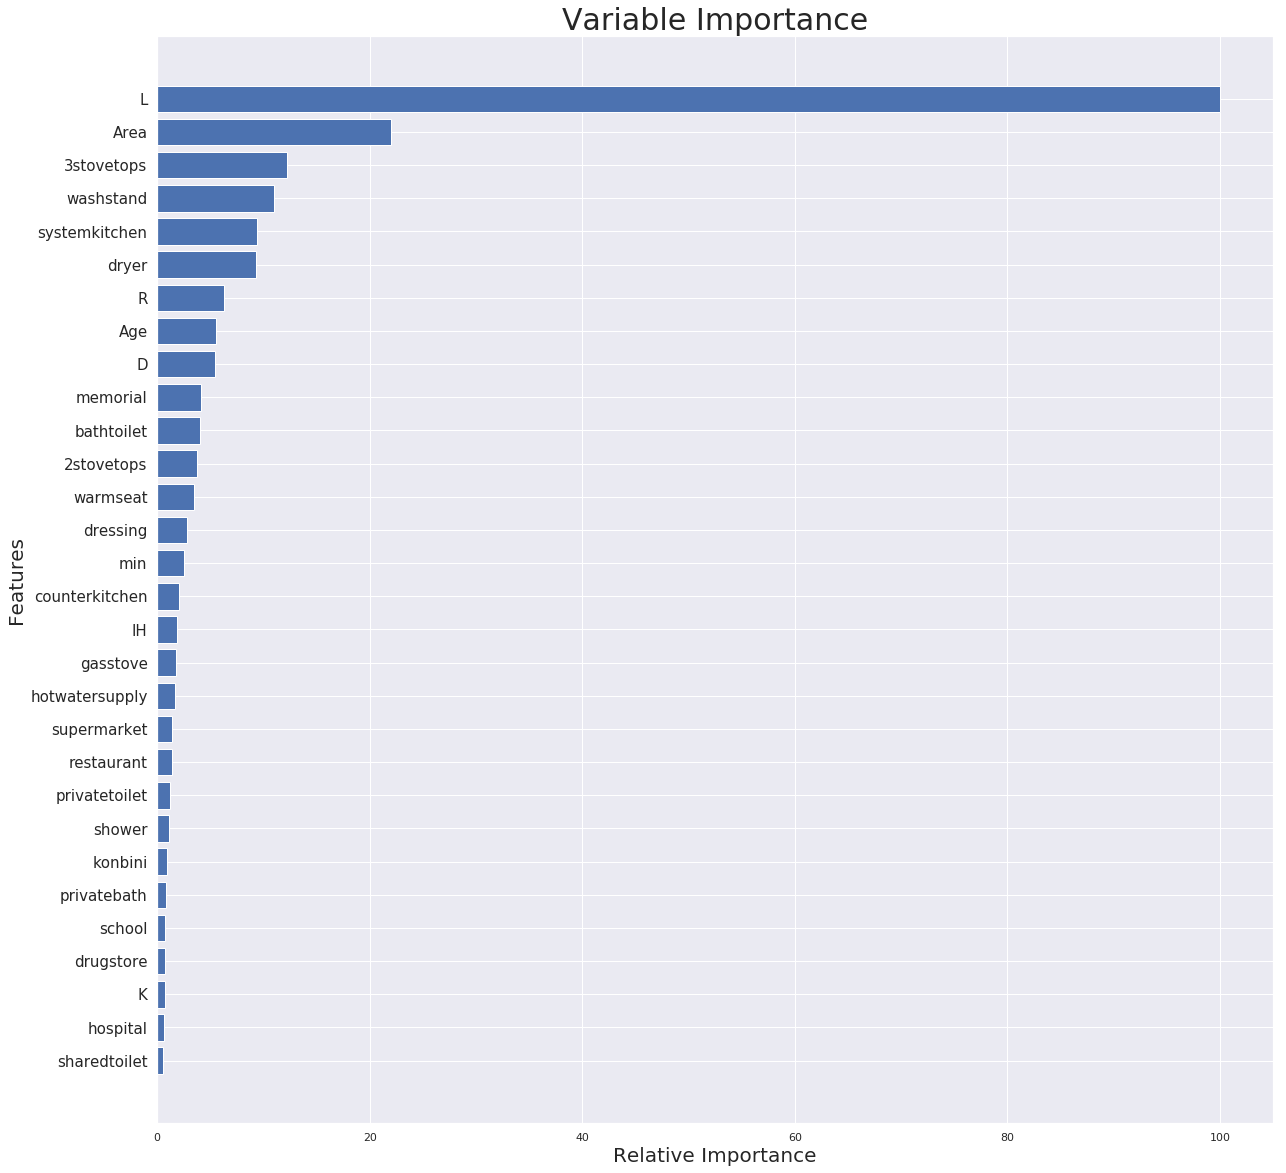

In [0]:
plot_feature_importance(model_xgb, X)


In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
modelfit(model_lgb, X, y)


Model Report
RMSE :  24985.5207
CV Score : Mean -  27749.1043 | Std -  4880.0551 | Min -  21692.5936 | Max - 37656.8892
Amount of time spent during training the model and cross validation: 20.687 seconds


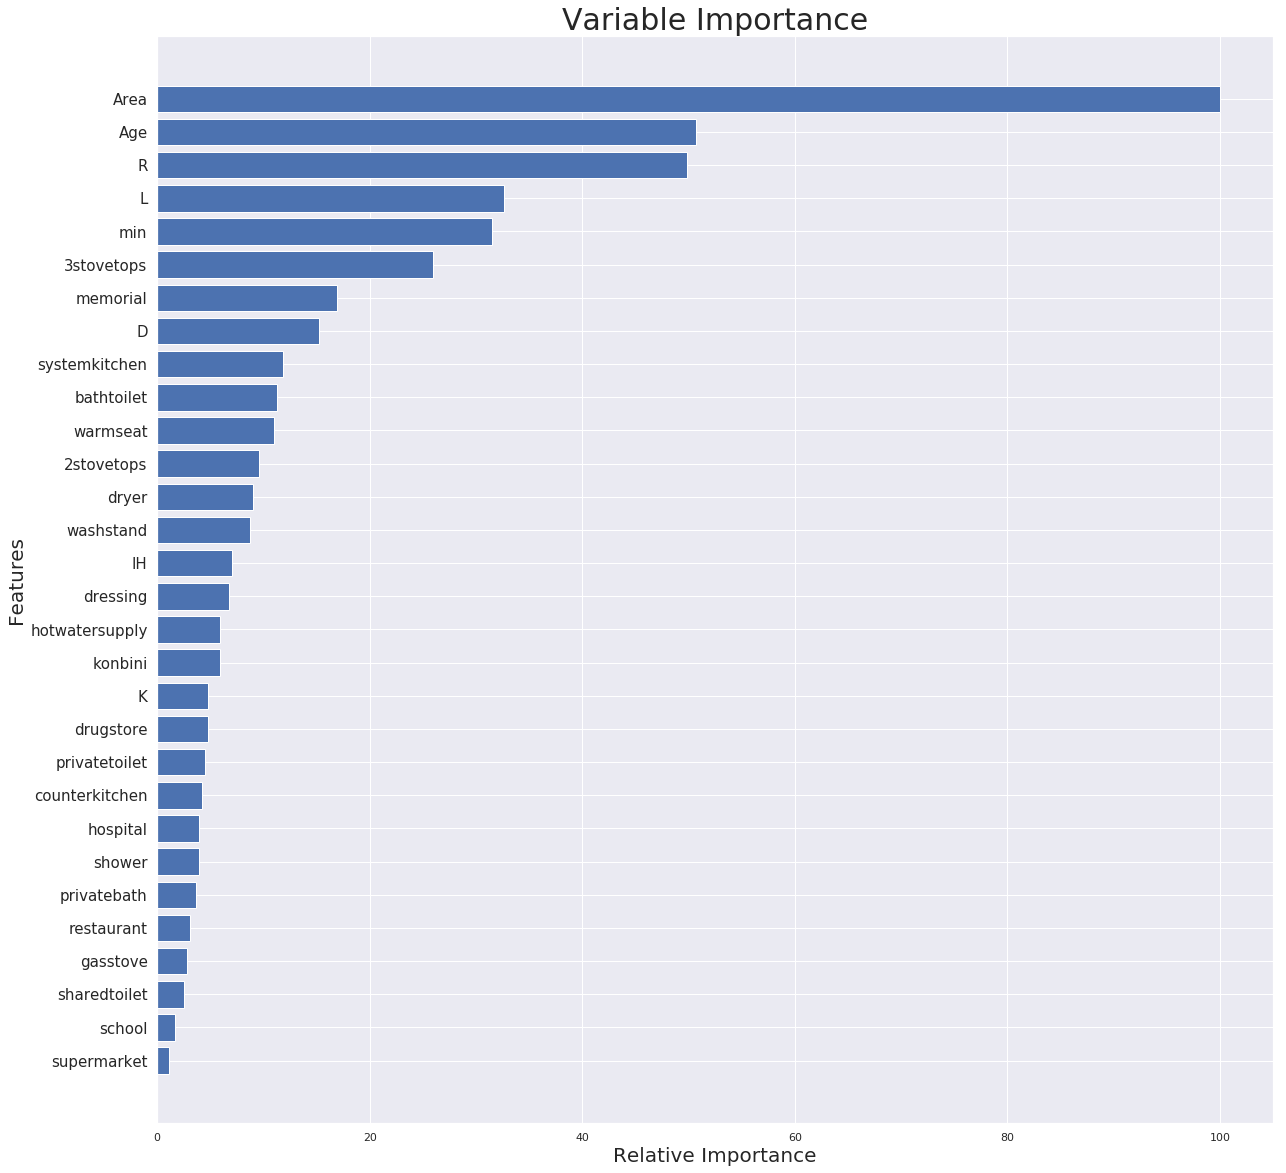

In [0]:
plot_feature_importance(model_lgb, X)


In [0]:

y_pred = np.zeros(X_test.shape[0], dtype='float32')
train_pred = np.zeros(X.shape[0], dtype='float32')

cv_score = 0
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid)
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.05,
    'max_depth': -1,
    'num_leaves': 5,
    'max_bin': 55,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'nthread': -1,
    'bagging_freq': 5,
    'verbose': -1,
    'seed': 1,
}
N_FOLDS = 5
MAX_BOOST_ROUNDS = 700
LEARNING_RATE = .0022
model = lgb.cv(params, train_data, num_boost_round=MAX_BOOST_ROUNDS, nfold=N_FOLDS, 
                    verbose_eval=20, early_stopping_rounds=40)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


[20]	cv_agg's rmse: 63099.8 + 1758.33
[40]	cv_agg's rmse: 55015.1 + 1630.76
[60]	cv_agg's rmse: 48342.3 + 1504.03
[80]	cv_agg's rmse: 43127.6 + 1460.44
[100]	cv_agg's rmse: 38963.8 + 1491.87
[120]	cv_agg's rmse: 35775.6 + 1571.75
[140]	cv_agg's rmse: 33386.1 + 1661.91
[160]	cv_agg's rmse: 31377.7 + 1788.06
[180]	cv_agg's rmse: 29878.2 + 1879.82
[200]	cv_agg's rmse: 28712.1 + 1987.97
[220]	cv_agg's rmse: 27761.2 + 2102.73
[240]	cv_agg's rmse: 27061.8 + 2176.71
[260]	cv_agg's rmse: 26448.2 + 2240.68
[280]	cv_agg's rmse: 25927.9 + 2305.19
[300]	cv_agg's rmse: 25541.6 + 2374.47
[320]	cv_agg's rmse: 25201.6 + 2408.25
[340]	cv_agg's rmse: 24909.5 + 2430.94
[360]	cv_agg's rmse: 24692.2 + 2467.13
[380]	cv_agg's rmse: 24495.1 + 2479.55
[400]	cv_agg's rmse: 24303.3 + 2497.69
[420]	cv_agg's rmse: 24159.5 + 2536.39
[440]	cv_agg's rmse: 24024.4 + 2561.7
[460]	cv_agg's rmse: 23923.9 + 2575.03
[480]	cv_agg's rmse: 23770.7 + 2572.99
[500]	cv_agg's rmse: 23665.4 + 2588.33
[520]	cv_agg's rmse: 23566.1 +

In [0]:
submit = pd.read_csv('sample_submit.csv', names=('id', 'Rent'))
submit['Rent'] = model_xgb.predict(X_test)
submit.head(10)
submit.to_csv('submission.csv', header=False, index=False)

In [0]:
submit.head(10)

,id,Rent
0,31471,120801.023438
1,31472,116773.148438
2,31473,77042.406250
3,31474,55664.562500
4,31475,118792.515625
5,31476,71040.585938
6,31477,94932.515625
7,31478,93855.500000
8,31479,83917.718750
9,31480,121846.296875


In [0]:
"""
train['Rent'] = 1
test['Rent'] = 0
df = pd.concat([train, test])
X = df.drop(['id', 'Rent'], axis=1)
y = df['Rent']
"""

In [0]:
"""
from sklearn.metrics import mean_squared_error, roc_auc_score
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid)
params = {
    'objective': 'binary',
    'metric': 'auc',
    'learning_rate': 0.01,
    'max_depth': -1,
    'num_leaves': 255,
    'max_bin': 255,
    'colsample_bytree': 0.8,
    'subsample': 0.8,
    'nthread': -1,
    'bagging_freq': 1,
    'verbose': -1,
    'seed': 1,
}
model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
                  num_boost_round=5000, early_stopping_rounds=200,
                  verbose_eval=200)

y_val_pred = model.predict(X_valid)
val_score =roc_auc_score(y_valid, y_val_pred)
print('AUC:', val_score)
"""

In [0]:

feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = model.feature_importance()
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
feature_importances


AttributeError: ignored

In [0]:
"""
plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.head(50), x='importance', y='feature')
"""